Customer Attrition Analysis

Primary objectives are to analyze the dataset, identify factors driving
customer turnover, develop an accurate Machine Learning model to predict potential departures,
and recommend customized retention strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:\\Users\\sreek\\Downloads\\verizonet_data.csv")

In [3]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


Displaying first 5 raws of Dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

This dataset consist of 7043 raws and 43 columns 
 -39   Churn Reason                       1869 non-null   object ,
 40  Total Customer Svc Requests        7043 non-null   int64 , 
 41  Product/Service Issues Reported    7043 non-null   int6,4  
 42  Customer Satisfaction rate      1834 non-null   floa,t64
 23  Total Regular Charges              7043 non-null   floa,t64
 24  Total Refunds                      7043 non-null   fl,
 22  Monthly Charge                     7043 non-null   float64 ,
 37  CLTV                               7043 non-null   int64 CLTV" stands for Customer Lifetime Value. Customer Lifetime Value 
 is a metric that represents the total value a customer brings to a company over the entire duration of their relationship.
 at6 these columns are most important amoung  .These are the important columns amoung the dataset.4   

In [5]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


mathematical discription of all  numerical columns which include total count,mean,standred deviation,
minimum,maximum,first percentile,second percentile,third percentile.

In [6]:
df.isnull()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
7040,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
7041,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True


checking is there any null values.

In [7]:
df['Churn Reason'].fillna('Unknown', inplace=True)

In [8]:
df['Churn Category'].fillna('Unknown', inplace=True)

In [9]:
mean_satisfaction = df['Customer Satisfaction rate'].mean()
df['Customer Satisfaction rate'].fillna(mean_satisfaction, inplace=True)


filling empty value in the dataset with corresponding values.

In [10]:
df[df.duplicated()]

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


checking any duplicated column present in the dataset ,no duplicated column present in the dataset.

In [11]:
skewness = df['Total Customer Svc Requests'].skew()

print("Skewness of Total Customer Svc Requests column:", skewness)

Skewness of Total Customer Svc Requests column: 1.3592222302987542


In this case, the skewness of the 'Total Customer Svc Requests' column is approximately 1.36, The distribution of this variable is right-skewed also known as positively skewed it suggests that there are more data points with lower values and fewer data points with higher values.

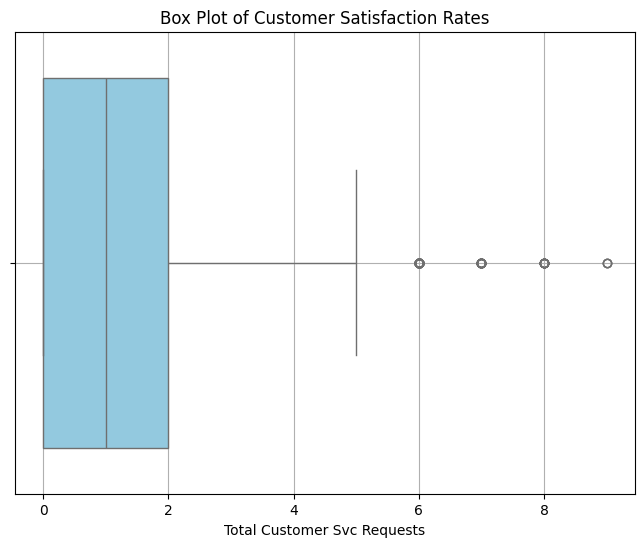

In [12]:
column_name = 'Total Customer Svc Requests'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_name], color='skyblue')
plt.title('Box Plot of Customer Satisfaction Rates')
plt.xlabel(column_name)
plt.grid(True)
plt.show()

Mean: 1.338776	,
Standard Deviation: 1.430471	,
25th Percentile (Q1):02
Median (50th Percentile, Q2)1 3
75th Percentile (Q32: 4
Minimum al0e: 1
Maxim1 9uThe majority of the data points are concentrated within the range of 0 to 2, as indicated by the interquartile range.
The median value of 1 suggests that half of the observations have a satisfaction rate below 1 and half have a satisfaction rate above 1.
The presence of outliers, such as the maximum value of 9, indicates that there are some extreme values in the data, which might be worth investigating further.ue: 5s.

In [13]:
Q1 = df['Total Customer Svc Requests'].quantile(0.25)
Q3 = df['Total Customer Svc Requests'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Total Customer Svc Requests'] >= lower_bound) & (df['Total Customer Svc Requests'] <= upper_bound)]
df_cleaned 

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,3.005453
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,3.005453
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,3.005453
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.000000
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,Unknown,Unknown,0,0,3.005453
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,Unknown,Unknown,2,0,3.005453
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,Unknown,Unknown,2,0,4.000000
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,Unknown,Unknown,0,0,3.005453


<function matplotlib.pyplot.show(close=None, block=None)>

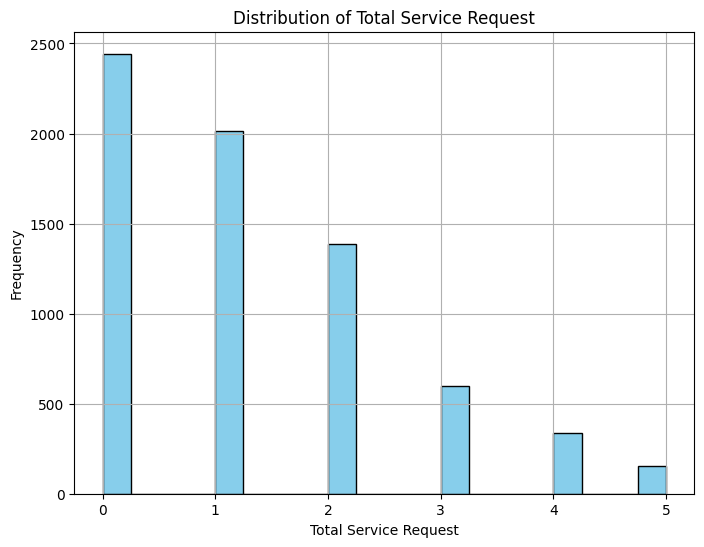

In [14]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.hist(df_cleaned['Total Customer Svc Requests'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Service Request')
plt.xlabel('Total Service Request')
plt.ylabel('Frequency')
plt.grid(True)
plt.show

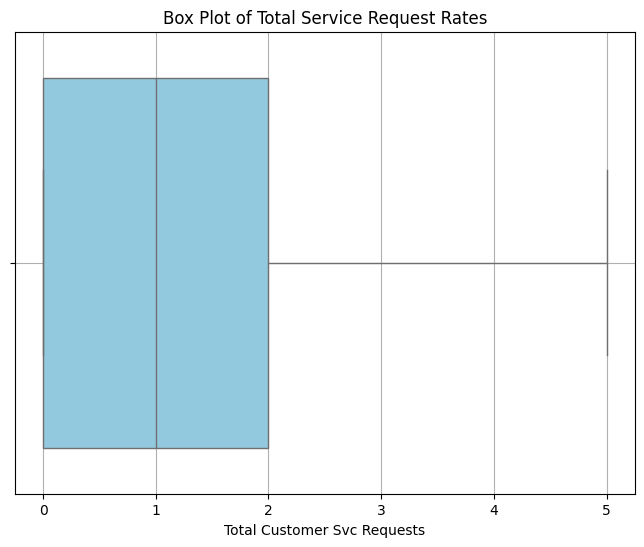

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned["Total Customer Svc Requests"], color='skyblue')
plt.title('Box Plot of Total Service Request Rates')
plt.xlabel(column_name)
plt.grid(True)
plt.show()

outlier removed and graph ploted for checking the accuracy .

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])


In [17]:
correlation_matrix = numerical_columns.corr()

In [18]:
print(correlation_matrix)

                                   Number of Referrals  Tenure in Months  \
Number of Referrals                           1.000000          0.326975   
Tenure in Months                              0.326975          1.000000   
Avg Monthly Long Distance Charges             0.006336          0.014596   
Avg Monthly GB Download                       0.024131          0.031410   
Monthly Charge                                0.016020          0.231389   
Total Regular Charges                         0.250378          0.826074   
Total Refunds                                 0.024756          0.059021   
Total Extra Data Charges                      0.086958          0.330911   
Total Long Distance Charges                   0.216190          0.674149   
Age                                          -0.025141          0.009927   
Zip Code                                      0.001463          0.007146   
Population                                   -0.007704         -0.012102   
Churn Status

Correlation measures the relationship between two numerical variables, it's applicable only to numerical columns.
This code will calculate the correlation matrix containing the correlation coefficients between all pairs of numerical columns in your DataFrame. Positive correlation values indicate a positive relationship between the variables, while negative correlation values indicate a negative relationship. A correlation value close to 1 or -1 suggests a strong relationship, while values close to 0 suggest a weak or no relationship.

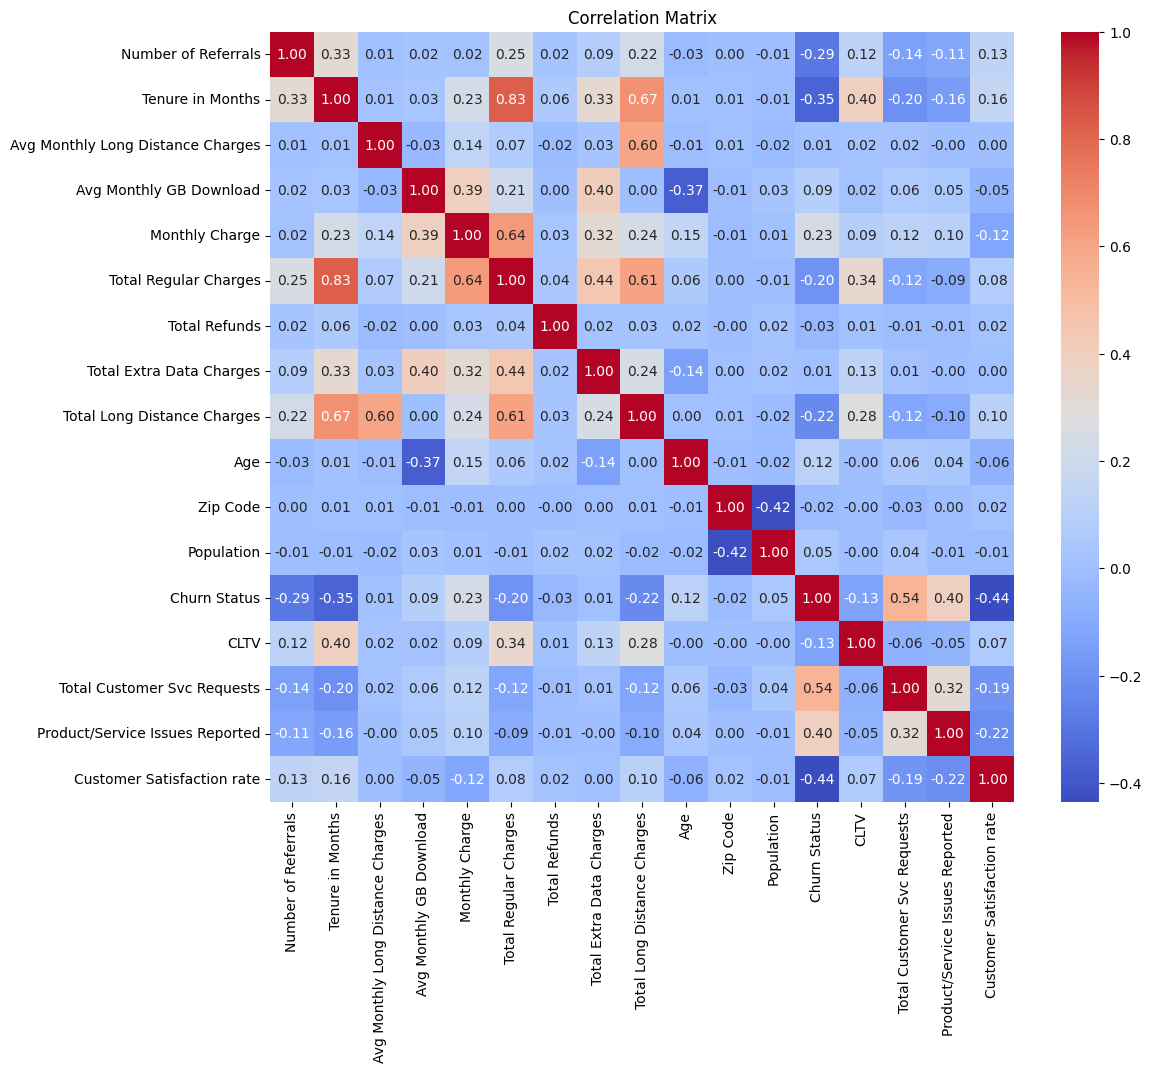

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Here visualize the correlation matrix as a heatmap.This heatmap will provide a visual representation of the correlation matrix, with annotations showing the correlation coefficients. It helps in identifying which pairs of numerical variables are strongly correlated or inversely correlated.

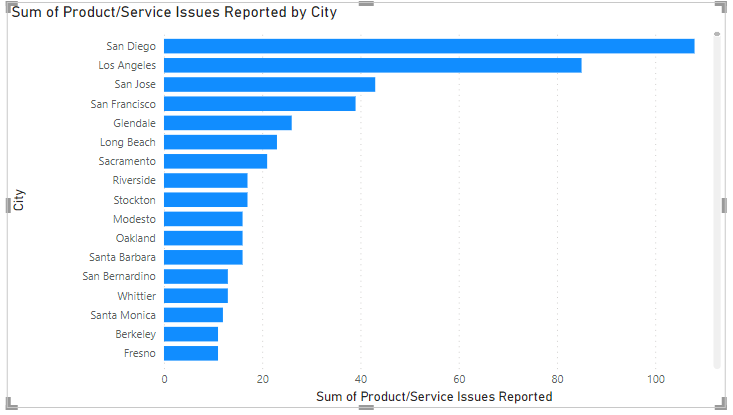

In [20]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 0.png")

This is the graphical representation of Product?Service Issues Reported by City, mostly probelms reported from san diego city.

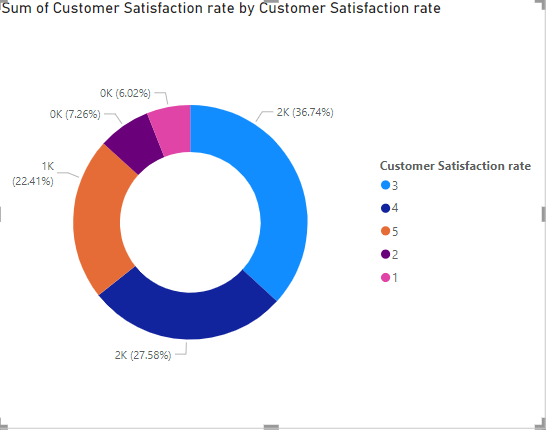

In [21]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 2.png")

Most of the customers are given high satisfaction rates ,36.74% are given  3 star on Customer Satisfaction rate .

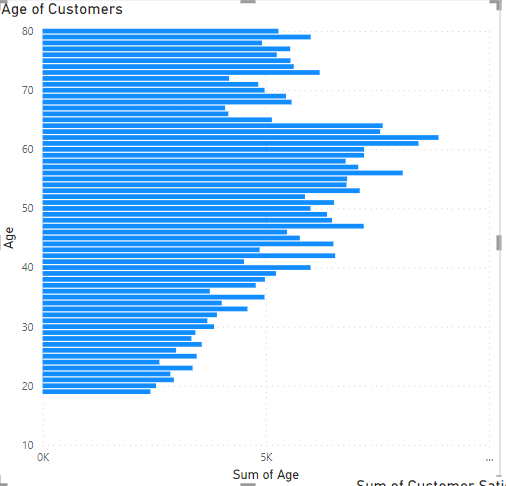

In [22]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 4.png")

Most of the Customers are Age between 40 to 60.

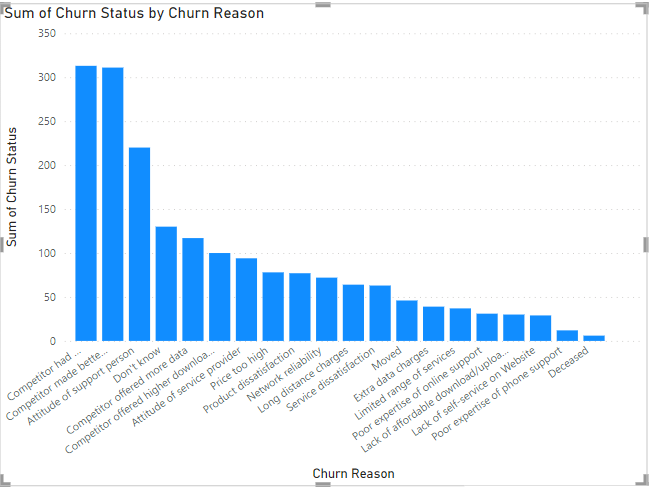

In [23]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 5.png")

Churn Reason collected from previous customers most of the customers churn becouse of better offer from competitor.

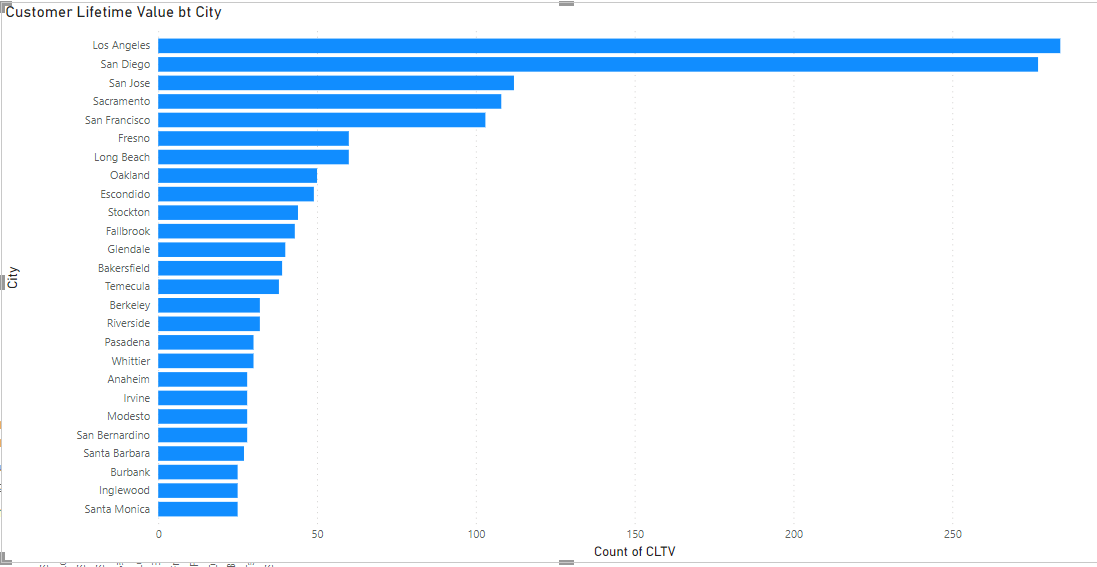

In [24]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 6.png")

Customer life time value added by company based on city.

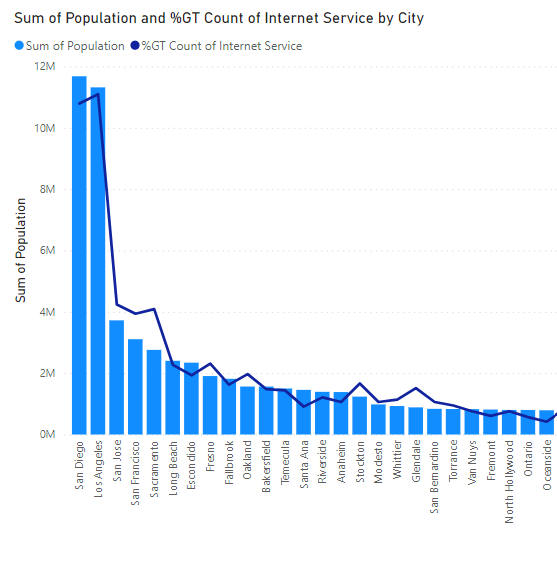

In [25]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 7.png")

Most populated citys having high rate of internet service.Most populated city san diego having 11 million
populated and the percentage of internet service 11 million.

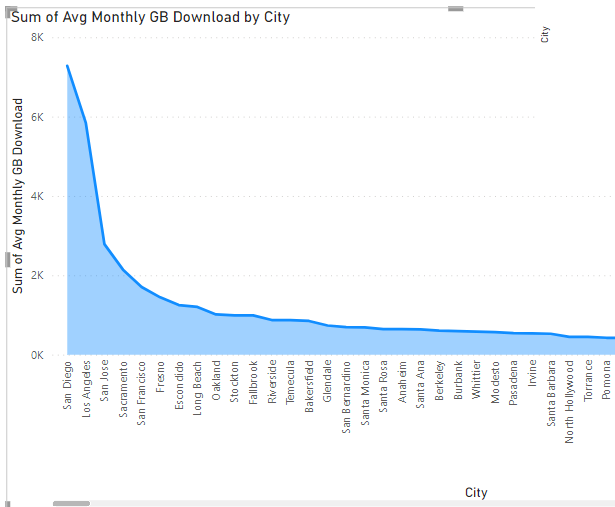

In [26]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 8.png")

Most Of customers are from San diego and los angels.

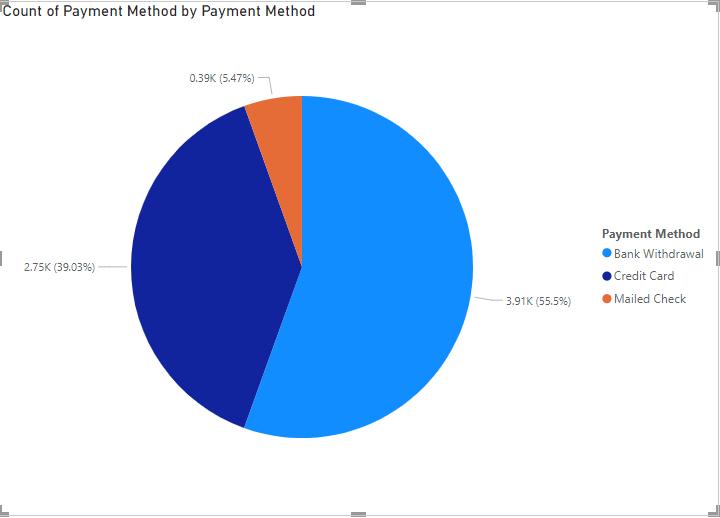

In [27]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 10.png")

most of the customers are using Bank withdrawal 55.5% of customers are choosen Bank withdrawal as the payment method.

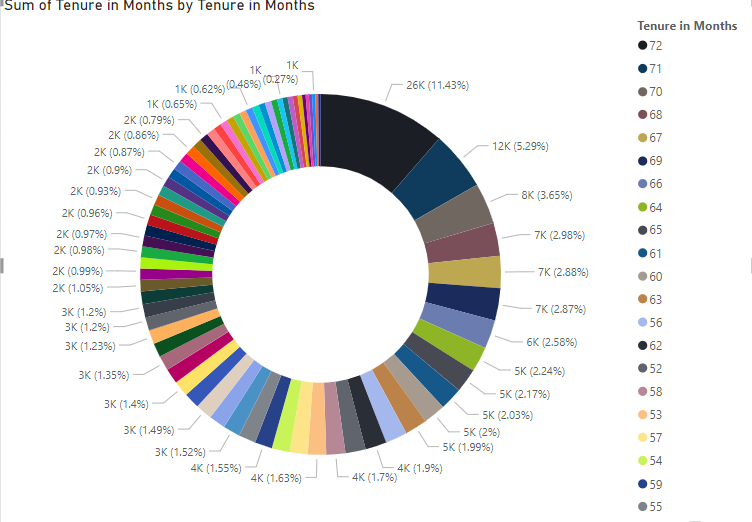

In [28]:
from IPython.display import Image
Image(filename="C:\\Users\\sreek\\OneDrive\\Pictures\\Screenshots\\final 11.png")

Most of the customers have choosen more than long term   tenure.

In [29]:
# Replace X with the predictor variables and y with the target variable
X = df_cleaned[['Number of Referrals', 'Tenure in Months', 'Monthly Charge', 'Total Regular Charges', 'Total Customer Svc Requests']]
y = df_cleaned['Churn Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8644556596971882


C:\Users\sreek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of Referrals: This feature represents the number of referrals a customer has made. A positive coefficient for this feature suggests that customers with more referrals are more likely to churn. Conversely, a negative coefficient would indicate that customers with more referrals are less likely to churn.

Tenure in Months: This feature represents the length of time the customer has been with the company. A negative coefficient for tenure would suggest that longer-tenured customers are less likely to churn, while a positive coefficient would indicate the opposite.

Monthly Charge: This feature represents the monthly charges paid by the customer. A positive coefficient suggests that customers with higher monthly charges are more likely to churn, while a negative coefficient would indicate that higher charges are associated with lower churn rates.

Total Regular Charges: This feature represents the total regular charges paid by the customer. Similar to monthly charges, a positive coefficient suggests that customers with higher total regular charges are more likely to churn.

Total Customer Service Requests: This feature represents the total number of customer service requests made by the customer. A positive coefficient suggests that customers who make more service requests are more likely to churn, possibly indicating dissatisfaction with the service.



In [30]:
from sklearn.metrics import mean_squared_error, r2_score
logistic_regression_mse = mean_squared_error(y_test, y_pred)
logistic_regression_r2 = print('MSE Score using logistic_regression '),r2_score(y_test, y_pred)
logistic_regression_mse


MSE Score using logistic_regression 


0.13554434030281182

In [31]:
print('R2 score using logistic_regression'),logistic_regression_r2

R2 score using logistic_regression


(None, (None, 0.29974326748520297))

MSE (Mean Squared Error) measures the average of the squares of the errors or deviations.
It's a measure of how close the predictions are to the actual outcomes.
R2 score, or coefficient of determination, is a statistical measure that represents 
the proportion of the variance for a dependent variable that's explained by an independent variable or
variables in a regression model. It's usually a value between 0 and 1, where 1 indicates a perfect fit.

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8507570295602018


Out of all the instances in the testing dataset, the Decision Tree model  predicted the churn status for about 84.28% of them.

In [33]:
decision_tree_mse = mean_squared_error(y_test, y_pred)
print('MSC Score using Decision_tree'),decision_tree_mse


MSC Score using Decision_tree


(None, 0.13554434030281182)

In [34]:
decision_tree_r2 = r2_score(y_test, y_pred)
print('R2 Score using Decision_tree'),decision_tree_r2


R2 Score using Decision_tree


(None, 0.29974326748520297)

In [35]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8774333093006489


In [36]:
random_forest_mse = mean_squared_error(y_test, y_pred)
print('MSE of random_forest'),random_forest_mse


MSE of random_forest


(None, 0.13554434030281182)

In [37]:
random_forest_r2 = r2_score(y_test, y_pred)
print('R2 score  random forest'),random_forest_r2

R2 score  random forest


(None, 0.29974326748520297)

 the accuracy of the Random Forest classifier on the testing data is approximately 87.74%.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.8961788031723144


The accuracy of the Gradient Boosting Classifier on the testing data is approximately 89.62%.

LogisticRegression Accuracy: 0.8644556596971882

Decision Tree Accuracy: 0.8428262436914203

Random Forest Accuracy: 0.8774333093006489

Gradient Boosting Accuracy: 0.8961788031723144



In [39]:
gradient_boosting_mse = mean_squared_error(y_test, y_pred)
print('MSE of gradient_boosting'),gradient_boosting_mse

MSE of gradient_boosting


(None, 0.13554434030281182)

In [40]:
gradient_boosting_r2 = r2_score(y_test, y_pred)

In [41]:
print('r2 score of gradient_boosting'),gradient_boosting_r2

r2 score of gradient_boosting


(None, 0.29974326748520297)

In [42]:
y_pred_gb 

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Most accurate Machine Learning model is Gradient Boosting Accuracy: 0.8961788031723144. Visualizing data Using Gradient boosting predicted value verses
actual data

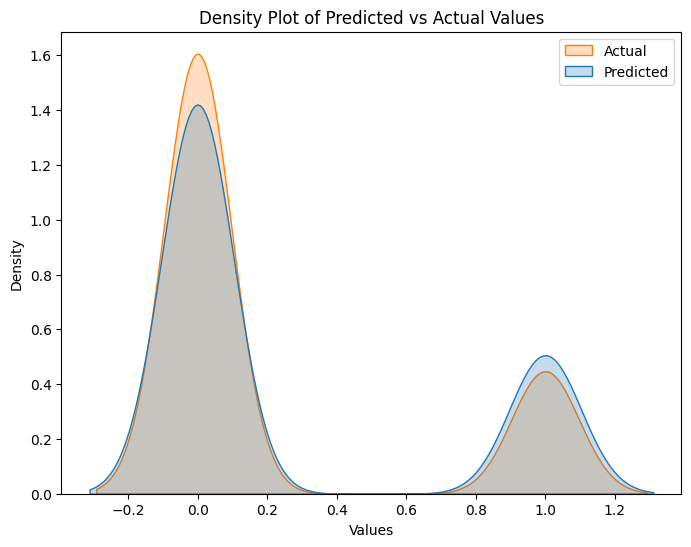

In [43]:
#### Combine actual and predicted values into a DataFrame
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

# Plot density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Predicted vs Actual Values')
plt.legend(labels=['Actual', 'Predicted'])
plt.show()

In the density plot of predicted versus actual values, the curves represent the distribution of the predicted and actual values.
X-axis: Represents the values of the predicted and actual outcomes.
Y-axis: Represents the density of these values, indicating how frequently they occur.

Based on the accuracy scores obtained from different machine learning models on the testing data:

Gradient Boosting Classifier achieved the highest accuracy of approximately 89.62%, indicating that it performed the best among the models evaluated.

Random Forest also demonstrated a strong performance with an accuracy of approximately 87.74%.

Logistic Regression achieved an accuracy of approximately 86.45%, followed closely by the Decision Tree with an accuracy of approximately 8

Business Implications: The insights gained from these models can be used to develop targeted strategies to reduce churn, such as improving customer service, offering personalized incentives, or enhancing product features based on the factors identified as influential in the models.

Continuous Improvement: As customer behavior and market dynamics evolve, it's crucial to regularly monitor and update the models to ensure their continued effectiveness in predicting churn and supporting businesdecision making.g.
4.28%.